## Estimating the Mean

We demonstrate how the sample mean approximates the distribution mean. 

### Convergence of Sample Mean

In lecture we saw that if we take $n$ samples, $X_1,\ldots, X_n$, the sample mean $\overline X=\frac{X_1+\ldots+X_n}n$ converges to the distribution mean $\mu$. The following program demonstrate that.

In [22]:
%pylab inline
import ipywidgets as widgets
from scipy.stats import norm, uniform

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [23]:
def Sample_Mean(n,r):
# n: sample size
# r: number of experiments

    figure(figsize=(20,10))
    xlim([1,n])
    ylim([-1, 1])
    grid()
    
    x = range(1,n+1)
    z = 1.0/sqrt(x)
    plot(x, z,'k--')
    plot(x, negative(z), 'k--')
    
    for i in range(r):
        y = random.normal(0, 1, n)
        m = divide(cumsum(y), x)
        plot(x, m, alpha=0.5)

The following graph shows how the sample mean $\overline X$ converges to the distribution mean $\mu$. The underlying distribution is standard normal. $n$ is the number of samples, and $r$ is the number of experiments.

Recall that the sample mean's expected value is always $\mu$, which here is 0, and that its standard deviation is $\frac\sigma{\sqrt n}$, which here is $\frac1{\sqrt n}$. The dashed black line shows this value and its negation. 

Observe:
* When the sample size $n$ increases, all curves get closer to the distribution mean 0.
* The $r$ sample means are typically bounded between the positive and negative standard deviations.

<function __main__.Sample_Mean>

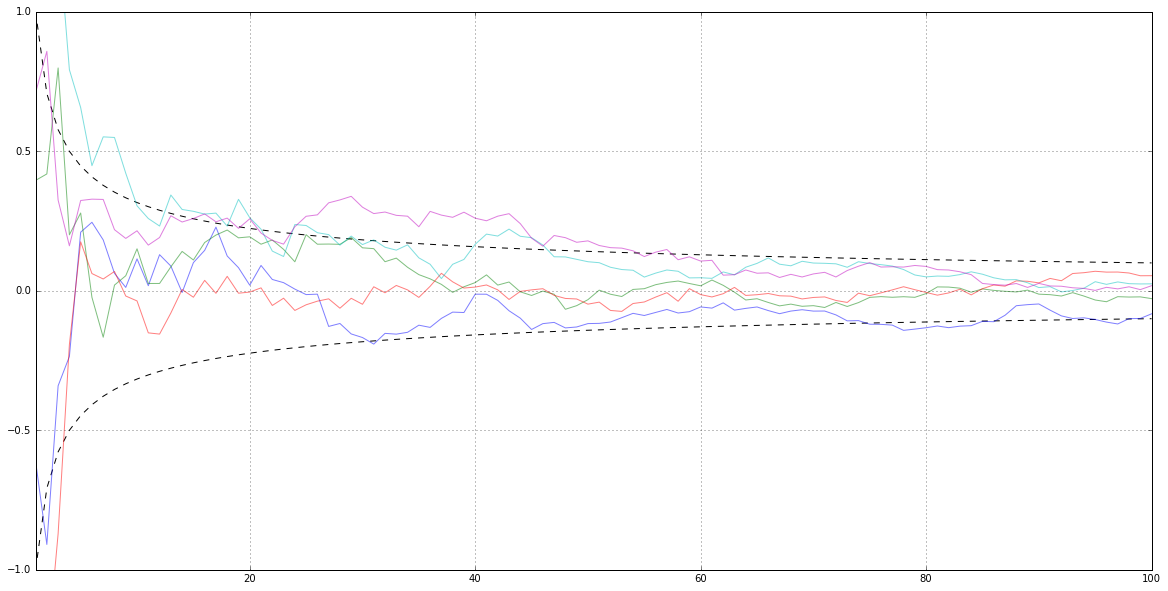

In [24]:
widgets.interact(Sample_Mean,
                 n=widgets.IntSlider(min=10, max=1000,description='sample size', step=10, value=100),
                 r=widgets.IntSlider(min=1, max=10,description='experiments', step=1, value=5))

### Distribution of the sample mean

Next consider the distribution of the sample mean $\overline X$. In this example the underlying distribution is either uniform or standard Normal (you can comment the code to choose). You can see that as the sample size $n$ increases the distribution of $\overline X$ becomes uniform, as predicted by the central limit theorem. If you sample from the normal distribution then $\overline X$ is exactly normal for any $n$. 

In [28]:
def Normal_Mean(n):
# n: sample size
# s: number of experiments
    figure(figsize=(20,10))
    title('histogram of sample means with sample size n=%d'%n,fontsize = 15)
    xlabel('$\overline{X}$',fontsize = 15)
    ylabel('frequency', fontsize = 15)
    grid()

    s = 100000
    
    x = linspace(-4,4,1000)
    #y = [norm.pdf(i,0,1) for i in x]
    y = [uniform.pdf(i,0,1) for i in x]
    plot(x,y)
    
    #X = random.normal(0,1,[n,s])
    X= random.uniform(0,1,[n,s])
    M = sum(X,axis=0)/n
    hist(M,bins=40,normed=1)

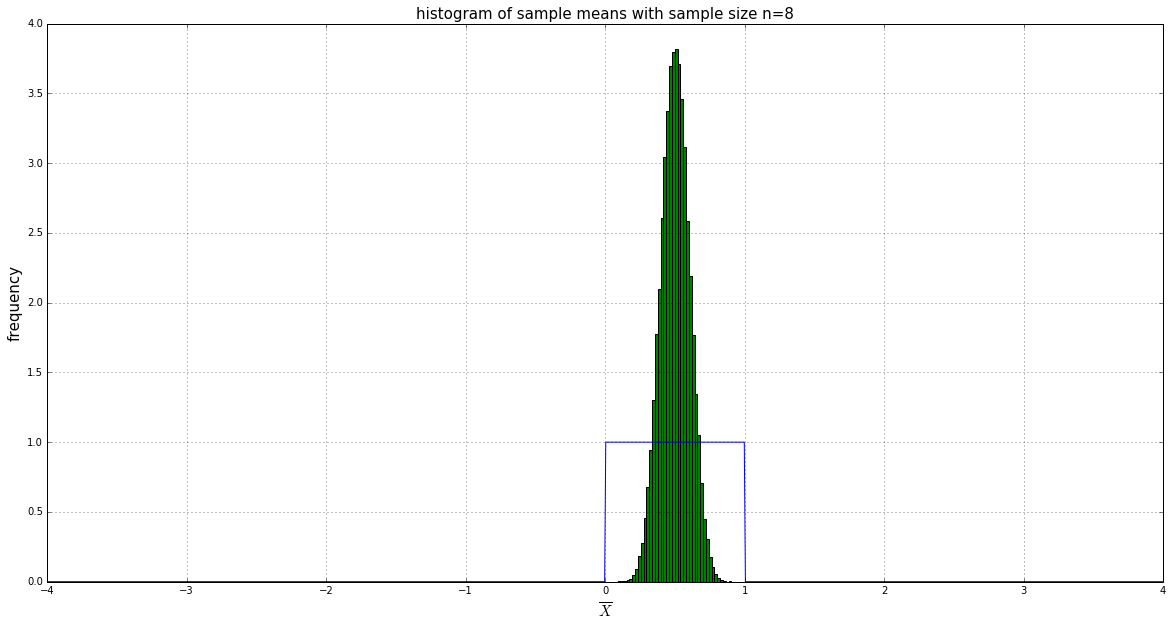

In [27]:
widgets.interact(
    Normal_Mean,
    n = widgets.IntSlider(min=1, max=30,description='sample size', step=1, value=0))

## Variance Estimation

Next we estimate the variance. 

### Raw (biased) Estimator

We start with the raw estimate that uses the intuitive normalization by $n$. We show experimentally that its expected value is $\frac{n-1}n\sigma^2$.

In this example the underlying distribution is standard Normal (but you can easily modify the code). The green line shows the true distribution variance, here 1. The red line shows the average of the "raw" (biased) sample variance. Observe that as you change $n$, the red line is roughly at $\frac{n-1}n$.

In [30]:
def Normal_Variance(n,df):
# n: sample size
# s: number of experiments
# df: degree of freedom
#     df=0: calculate "raw" variance 
#     df=1: calculate unbiased variance 
    figure(figsize=(20,10))
    xlim([0,4])
    
    s = 1000000
    X = random.normal(0,1,[n,s])
    V = var(X,axis=0,ddof=df)
    v = mean(V)
    
    plot([v,v], [0, 3], 'r--', linewidth = 2.0)
    hist(V,bins=60,normed=1);

    plot([1,1], [0, 3], 'g:', linewidth = 2.0)
    ylabel('frequency', fontsize = 15)
    grid()

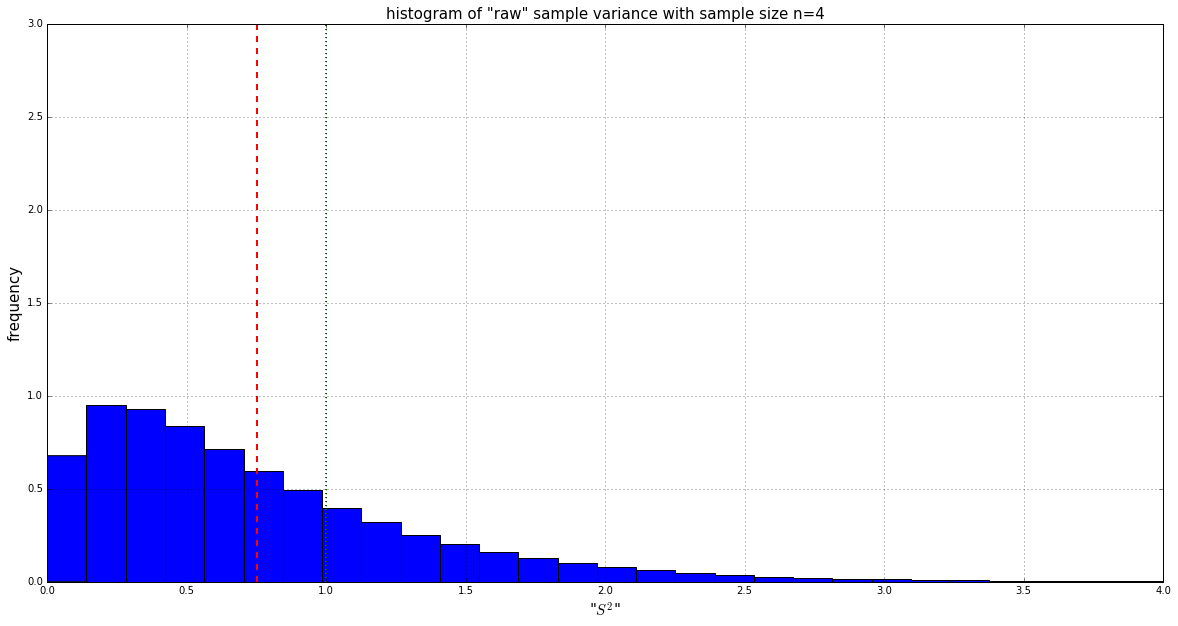

In [31]:
def Raw_Variance(n):
    Normal_Variance(n,0)
    title('histogram of "raw" sample variance with sample size n=%d'%n,fontsize = 15)
    xlabel('"$S^2$"', fontsize = 15)
widgets.interact(
    Raw_Variance,
    n = widgets.IntSlider(min=2, max=20,description='n=', step=1, value=2))

### Unbiased Variance Estimator

Next we apply the Bessel correction, where instead of normalizing by $n$, we normalize by $n-1$. We show experimentally that this estimator is unbiased.

Again, the underlying distribution is standard Normal. The red line shows the expectation of the unbiased sample variance and the blue line shows the true distribution variance. And we can see that those two lines overlap for all $n$.

<function __main__.Unbiased_Variance>

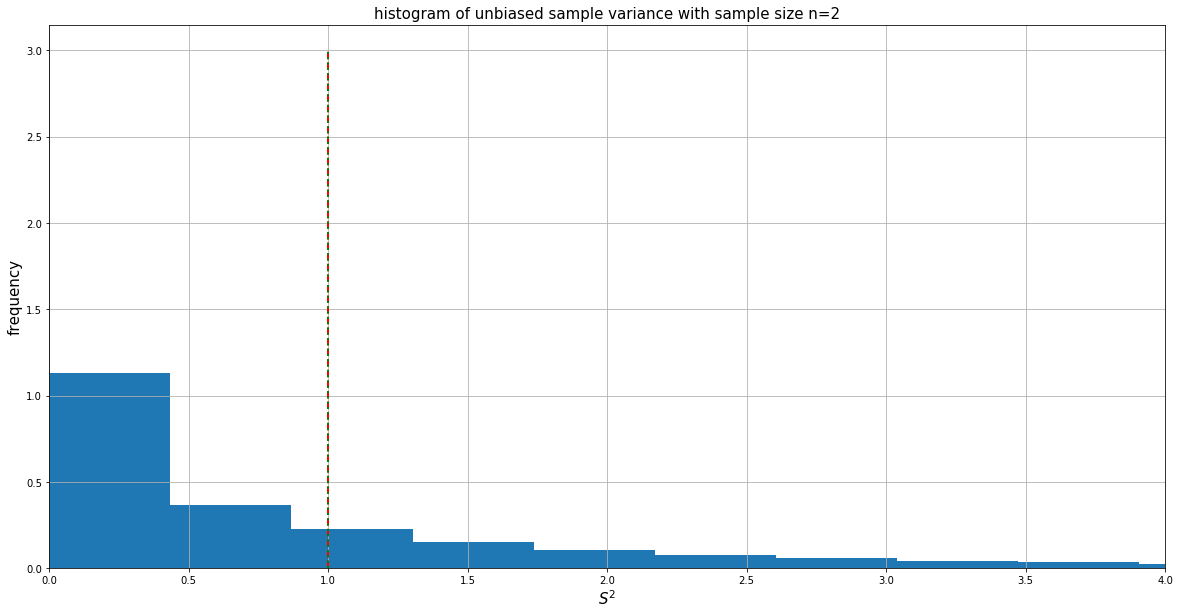

In [125]:
def Unbiased_Variance(n):
    Normal_Variance(n,1)
    title('histogram of unbiased sample variance with sample size n=%d'%n,fontsize = 15)
    xlabel('$S^2$', fontsize = 15)
widgets.interact(
    Unbiased_Variance,
    n = widgets.IntSlider(min=2, max=20,description='n=', step=1, value=2))

## Estimating the standad deviation

We apply the standard standard-deviation estimator and show that on average it underestimates $\sigma$. 

In [33]:
def Normal_SD(n):
# n: sample size
# s: number of experiments

    figure(figsize=(20,10))
    xlim([0,3])
    title('histogram of sample standard deviation with sample size n=%d'%n,fontsize = 15)
    xlabel('$\hat{\sigma}$', fontsize = 15)
    
    s = 1000000
    X = random.normal(0,1,[n,s])
    V = sqrt(var(X,axis=0,ddof=1))
    v = mean(V)
    
    plot([v,v], [0, 3], 'r--', linewidth = 2.0)
    hist(V,bins=60,normed=1);

    plot([1,1], [0, 3], 'g:', linewidth = 2.0)
    ylabel('frequency', fontsize = 15)
    grid() 

We continu to use the standard normal as the underlying distribution. The green line shows the distribution's true standard deviation $\sigma=1$. The red line shows the average of the sample standard deviation (square root of unbiased sample variance). Observe that the sample standard deviation underestimates $\sigma$, but this underestimate shrinks as you increase $n$.

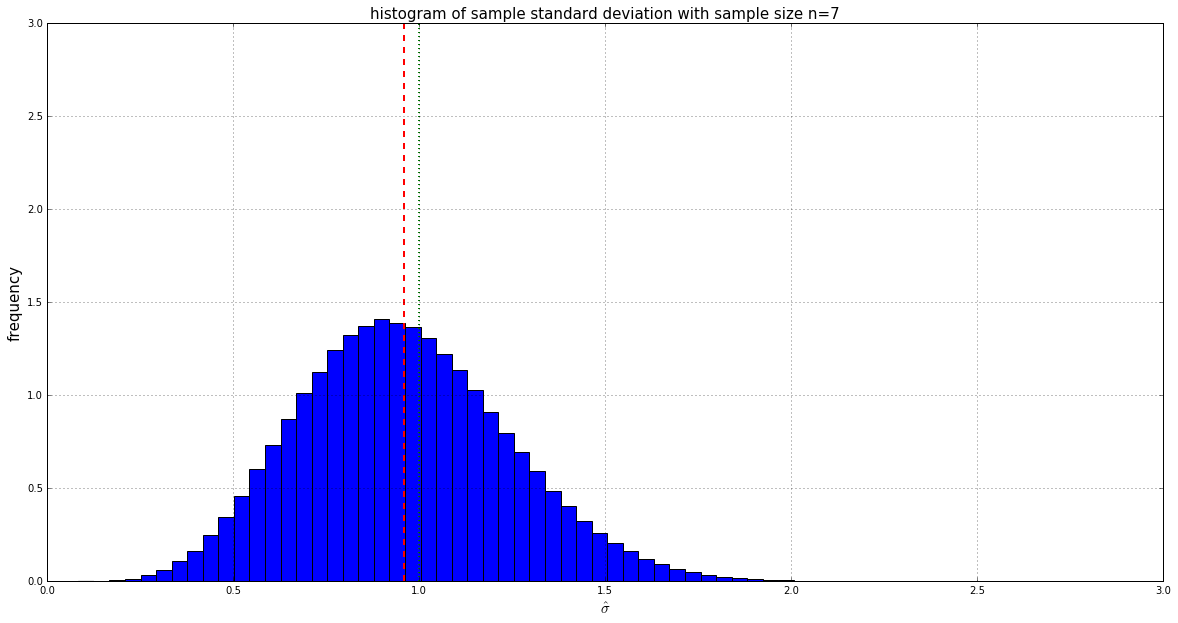

In [34]:
widgets.interact(
    Normal_SD,
    n = widgets.IntSlider(min=2, max=10,description='n=', step=1, value=2))